In [1]:
from syft import Worker
import syft as sy
worker = Worker.named("test-domain-1", processes=1, reset=False)
root_domain_client = worker.root_client

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /Users/koen/workspace/pysyft


SQLite Store Path:
!open file:///var/folders/q1/ryq93kwj055dlbpngxv1c7z40000gn/T/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.Data

# Download mock and submit project

## Get mock

In [2]:
guest_domain_client = worker.guest_client
guest_client = guest_domain_client.login(email="jane@caltech.edu", password="abc123")

In [3]:
ds = guest_domain_client.datasets[0]

In [4]:
asset = ds.assets["complaints"]

In [5]:
complaints = asset.mock

## Selecting only noise complaints


I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [6]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,504803,1997-12-21 06:54:53,1978-07-30 15:04:29,DPR,Sandy Keller,'Animal in a Park',Branch or Limb Has Fallen Down,School,25050,"49284 Darren Parks Apt. 211\nPort Devin, NM 97029",...,None,Eastbound,Ramp,Harding Ave (Exit 9) - Throgs Neck Br,Far Rockaway #2 Field,None,JEWISH ASSOCIATION FOR SERVICES FOR THE AGED (...,-70.225696,-175.691661,"[108.354661, 5.244617]"
1,580809,2012-04-24 22:10:10,2008-03-03 23:13:05,DPR,Cassandra Sanders,Noise - Street/Sidewalk,Broken Fence,Other (explain in Complaint Details),93141,"8761 Mayo Path Suite 226\nLake Jacqueline, LA ...",...,FDR Dr,West/Toward Triborough Br,Ramp,Harding Ave (Exit 9) - Throgs Neck Br,Far Rockaway #2 Field,Staten Island Bound,IRA WEINSTEIN,-116.358749,-63.095821,"[178.776026, 55.882875]"
2,753216,1985-07-30 18:17:26,1993-11-24 02:17:04,DOHMH,David Barnett,'Animal in a Park',Broken Fence,Store/Commercial,65716,"8804 Scott Forks Apt. 511\nBooneburgh, IN 17496",...,Prospect Expwy,North/Westchester County Bound,Roadway,Grand Central Pkwy (Exit 1 E-W),White Plains Road Field,None,Molinari,118.941423,-152.828137,"[-129.871898, -2.675889]"
3,827745,1982-07-29 21:28:48,2014-03-09 20:35:31,DOHMH,Lisa Allison,'Animal in a Park',Broken Glass,None,55577,"512 Vasquez Turnpike\nNicoleside, HI 64372",...,Washington Br/181 Street Br.,Brooklyn Bound,None,Grand Central Pkwy (Exit 1 E-W),Broome and Ludlow Field,Staten Island Bound,HOWARD BEACH SENIOR CENTER,54.995201,-150.423963,"[-9.467789, -78.315292]"
4,530222,2011-11-14 14:10:30,2008-07-27 17:51:38,DOHMH,Michael Juarez,Illegal Parking,Broken Fence,Catering Hall,54361,"178 Rivera Ports\nTracytown, GU 59651",...,Bronx River Pkwy,Eastbound,None,Harding Ave (Exit 9) - Throgs Neck Br,St. George Field,Manhattan Bound,DORIS GREEN,58.179687,-22.112503,"[-22.112503, 4.010103]"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.



In [7]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,580809,2012-04-24 22:10:10,2008-03-03 23:13:05,DPR,Cassandra Sanders,Noise - Street/Sidewalk,Broken Fence,Other (explain in Complaint Details),93141,"8761 Mayo Path Suite 226\nLake Jacqueline, LA ...",...,FDR Dr,West/Toward Triborough Br,Ramp,Harding Ave (Exit 9) - Throgs Neck Br,Far Rockaway #2 Field,Staten Island Bound,IRA WEINSTEIN,-116.358749,-63.095821,"[178.776026, 55.882875]"
5,609185,1975-06-20 11:43:22,1989-08-03 12:24:07,DPR,Melanie Smith,Noise - Street/Sidewalk,Broken Fence,School,56222,"14860 Christina Shoal\nAliciaborough, MS 97657",...,Nassau Expwy,Eastbound/To Ocean Pkwy,Ramp,Hamilton Ave (Exit 2A) - Gowanus Expwy (I-278)...,Bayside Field,Manhattan Bound,Spirit of America,31.657675,-137.047176,"[-40.788739, 76.041059]"
9,724367,2004-01-19 05:14:33,2005-07-09 05:42:55,DPR,Jacob Harris,Noise - Street/Sidewalk,Broken Glass,Street Address,79656,"22691 Mary Mills Apt. 092\nScottstad, FM 35863",...,Queens Midtown Tunnel,East Bound,Ramp,Grand Central Pkwy (Exit 1 E-W),St. George Field,Manhattan Bound,St. George Terminal (Staten Island),-108.383224,73.794371,"[49.299008, 22.388005]"


If you look at noise_complaints, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [8]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0         False
1          True
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068     True
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to True. It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the & operator like this:

In [9]:
is_noise = (complaints['Complaint Type'] == "Noise - Street/Sidewalk")
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
66,724234,1998-11-11 21:07:20,1985-06-25 22:45:57,DPR,Lindsey Murray,Noise - Street/Sidewalk,Branches Damaged,Service Provider,82458,"76075 Calderon Roads\nSuarezland, AL 94786",...,Queens Midtown Tunnel,West/Manhattan Bound,Ramp,Grand Central Pkwy (Exit 1 E-W),Astoria Field,None,YNES KING,170.183775,-78.315292,"[-17.809010, -72.465675]"
85,289007,1997-12-19 16:07:59,2016-08-29 16:40:41,NYPD,Toni Ramirez,Noise - Street/Sidewalk,Broken Fence,Other,40588,"355 Laura Green\nWest Vincent, OK 25679",...,West Shore Expwy,North/Eastbound,Roadway,Grand Central Pkwy (Exit 10) - 69th Rd-Jewel A...,Ditmars #1 and #2 Field,Manhattan Bound,DORIS GREEN,-50.632517,68.951825,"[39.421562, -152.828137]"
118,557758,1982-04-17 14:23:22,1997-12-19 16:07:59,DOHMH,Robin Rocha,Noise - Street/Sidewalk,Broken Fence,Street/Sidewalk,60689,"441 Ewing Overpass Suite 728\nDeborahstad, CA ...",...,Alexander Hamilton/I-95 Cross Bronx Br,South/Manhattan Bound,Roadway,GrandCentral Pkwy/VanWyck Expwy/College Point ...,Flushing #3 Field,None,STEIN SENIOR CENTER,6.825489,-31.184482,"[49.299008, -32.048316]"
132,573366,2022-07-03 06:00:43,1994-02-27 06:23:33,DPR,Tanya Watson,Noise - Street/Sidewalk,Broken Glass,Club/Bar/Restaurant,29054,"6831 Robinson Bypass Suite 325\nRossland, ND 8...",...,BQE/Gowanus Expwy,South/New Jersey Bound,Roadway,GrandCentral Pkwy/VanWyck Expwy/College Point ...,SI Ferry Terminal,Staten Island Bound,FRANCISCA URBANO,-135.818923,39.421562,"[-164.485647, 84.951557]"
145,487971,2008-08-11 15:13:13,1982-04-17 14:23:22,NYPD,Jennifer Shaw,Noise - Street/Sidewalk,Branch or Limb Has Fallen Down,Medical Facility,43195,"0144 Watson Cove\nLake Lawrenceberg, NM 91425",...,None,Manhattan Bound,None,Grand Central Pkwy (Exit 1 E-W),Flatbush/Caton Field,None,DORIS GREEN,-129.871898,-51.383282,"[172.892616, -149.160972]"


Or if we just wanted a few columns:



In [10]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
66,Noise - Street/Sidewalk,BROOKLYN,1998-11-11 21:07:20,Branches Damaged
85,Noise - Street/Sidewalk,BROOKLYN,1997-12-19 16:07:59,Broken Fence
118,Noise - Street/Sidewalk,BROOKLYN,1982-04-17 14:23:22,Broken Fence
132,Noise - Street/Sidewalk,BROOKLYN,2022-07-03 06:00:43,Broken Glass
145,Noise - Street/Sidewalk,BROOKLYN,2008-08-11 15:13:13,Branch or Limb Has Fallen Down
148,Noise - Street/Sidewalk,BROOKLYN,1998-06-19 09:05:27,Broken Fence
171,Noise - Street/Sidewalk,BROOKLYN,1999-11-18 02:49:16,Broken Glass
185,Noise - Street/Sidewalk,BROOKLYN,1982-07-29 21:28:48,Branch or Limb Has Fallen Down
235,Noise - Street/Sidewalk,BROOKLYN,2020-01-10 21:33:25,Branches Damaged
251,Noise - Street/Sidewalk,BROOKLYN,2008-08-11 15:13:13,Branch or Limb Has Fallen Down


## A digression about numpy arrays

On the inside, the type of a column is pd.Series

In [11]:
import pandas as pd
import numpy as np

In [12]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add .values to the end of any Series, you'll get its internal numpy array

In [13]:
np.array([1,2,3])

array([1, 2, 3])

In [14]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [15]:
arr = np.array([1,2,3])

In [16]:
arr != 2

array([ True, False,  True])

In [17]:
arr[arr != 2]

array([1, 3])

## So, which borough has the most noise complaints?

In [18]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

STATEN ISLAND    6208
Unspecified      6180
BRONX            6107
MANHATTAN        6085
QUEENS           6078
BROOKLYN         6071
Name: Borough, dtype: int64

It's the BRONX (for this Mock)! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [19]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [20]:
noise_complaint_counts

STATEN ISLAND    6208
Unspecified      6180
BRONX            6107
MANHATTAN        6085
QUEENS           6078
BROOKLYN         6071
Name: Borough, dtype: int64

In [21]:
noise_complaint_counts / complaint_counts

BRONX            0.326508
BROOKLYN         0.330071
MANHATTAN        0.330563
QUEENS           0.330776
STATEN ISLAND    0.334339
Unspecified      0.331883
Name: Borough, dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting complaint_counts into an array of floats.

In [22]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.326508
BROOKLYN         0.330071
MANHATTAN        0.330563
QUEENS           0.330776
STATEN ISLAND    0.334339
Unspecified      0.331883
Name: Borough, dtype: float64

<AxesSubplot: >

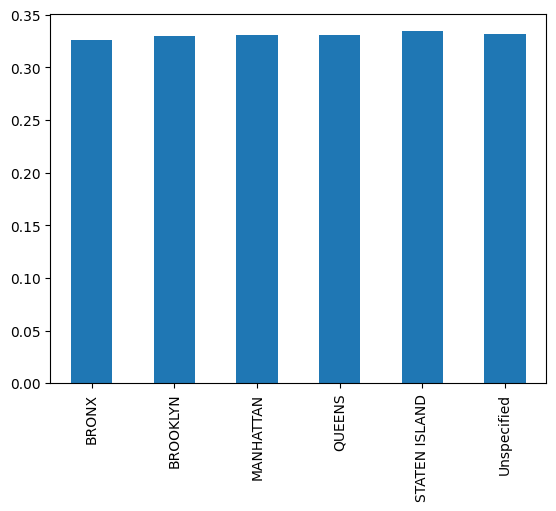

In [23]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Bronx really does complain more about noise than the other boroughs in our mock! Neat.

# Request real result

Now that we finished our analysis on the mock data, we can request this execution on the real data.

In [24]:
@sy.syft_function(input_policy=sy.ExactMatch(complaints=asset.mock),
                  output_policy=sy.SingleExecutionExactOutput())
def get_counts(complaints):
    is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
    noise_complaints = complaints[is_noise]
    noise_complaint_counts = noise_complaints['Borough'].value_counts()
    complaint_counts = complaints['Borough'].value_counts()
    return noise_complaint_counts / complaint_counts.astype(float)

Request code execution

In [25]:
req = guest_domain_client.api.services.code.request_code_execution(get_counts)

In [26]:
submitted_code = guest_domain_client.code[0]

In [27]:
assert guest_domain_client.api.services.code.get_all()

Create and submit project

In [28]:
new_project = sy.Project(name="Pandas chapter 3",
                         description="Hi, I would like to plot the histogram of the noise complaint counts per area.")

In [29]:
new_project.add_request(obj=submitted_code, permission=sy.UserCodeStatus.EXECUTE)

In [30]:
guest_domain_client.submit_project(new_project)

<class 'syft.core.node.new.response.SyftSuccess'>: Project Submitted